<a href="https://colab.research.google.com/github/eleurent/IGNite/blob/master/IGNite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports
!apt-get -qq install -y gdal-bin libgdal-dev
!pip install --global-option=build_ext --global-option="-I/usr/include/gdal" GDAL==`gdal-config --version`

!git clone https://github.com/eleurent/IGNite.git
%cd IGNite
!pip install -r requirements.txt

DEPRECATION: --build-option and --global-option are deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use --config-settings. Discussion can be found at https://github.com/pypa/pip/issues/11859
fatal: destination path 'IGNite' already exists and is not an empty directory.
/content/IGNite
  Using cached amqp-2.5.1-py2.py3-none-any.whl (49 kB)
  Using cached billiard-3.6.1.0-py3-none-any.whl (89 kB)
  Using cached celery-4.3.0-py2.py3-none-any.whl (413 kB)
  Using cached certifi-2019.6.16-py2.py3-none-any.whl (157 kB)
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Using cached Click-7.0-py2.py3-none-any.whl (81 kB)
  Using cached Flask-1.1.1-py2.py3-none-any.whl (94 kB)
  Using cached idna-2.8-py2.py3-none-any.whl (58 kB)
  Using cached importlib_metadata-0.19-py2.py3-none-any.whl (26 kB)
  Using cached itsdangerous-1.1.0-py2.py3-none-any.whl (16 kB)
  Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
  Using cached kombu-4.6.4-py2.

In [ ]:
#@title Run IGNite
upper_left = 16983,11697  #@param
lower_right = 16986,11698  #@param
zoom = 15  #@param
output_path = 'out'  #@param
cache_folder = 'cache'  #@param
no_caching = False  #@param  #@param {"type": "boolean"}
processes = 4  #@param
convert_to_wmts = False  #@param {"type": "boolean"}

import numpy as np
import backend.ign


tiled_map = backend.ign.IGNMap(
    min_point=np.array(upper_left),
    max_point=np.array(lower_right),
    zoom=zoom,
    output_path=output_path,
    cache_folder=cache_folder,
    no_caching=no_caching,
    processes=processes,
    convert_to_wmts=convert_to_wmts
)
tiled_map.run()

MinTileRow                                                         53
MaxTileRow                                                      32714
MinTileCol                                                        455
MaxTileCol                                                      32312
ScaleDenominator                               17061.8366707982883188
TopLeftCorner       -20037508.3427891992032528 20037508.3427891992...
TileWidth                                                         256
TileHeight                                                        256
MatrixWidth                                                     32768
MatrixHeight                                                    32768
Name: 15, dtype: object


Fetching: 100%|██████████| 8/8 [00:00<00:00, 1207.30it/s]


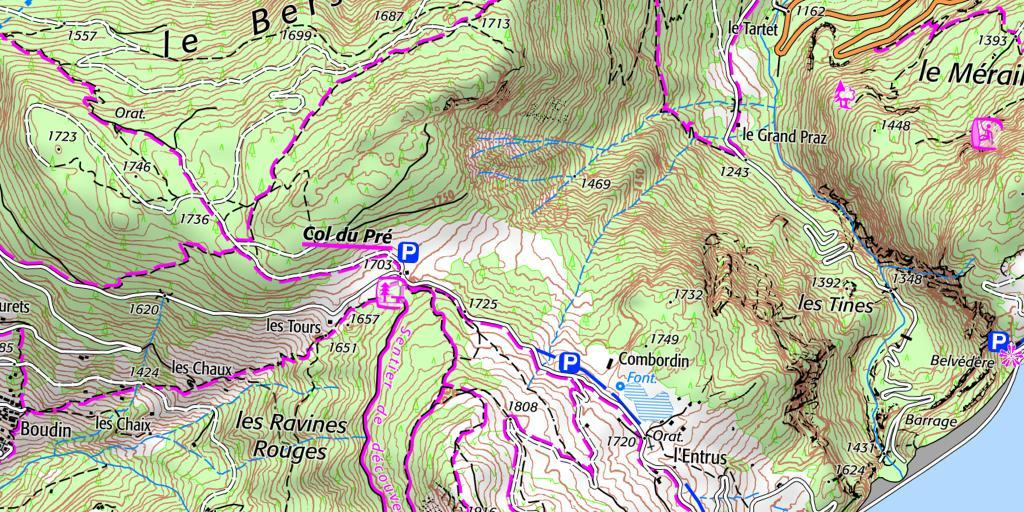

In [ ]:
#@title Display jpg map

from IPython.display import Image

Image(filename='out.jpg')
